In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/importlib/_bootstrap.py:205: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
/home/pydemia/apps/anaconda3/envs/tf-py36/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
num_points = 1000
vectors_set = []
for i in range(num_points):
    x1= np.random.normal(0.0, 0.55)
    y1= x1 * 0.1 + 0.3 + np.random.normal(0.0, 0.03)
    vectors_set.append([x1, y1])

x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

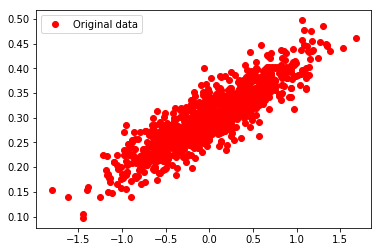

In [3]:
plt.plot(x_data, y_data, 'ro', label='Original data')
plt.legend()
plt.show()

In [4]:
W = tf.Variable(tf.random_uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))
y = W * x_data + b

In [5]:
loss = tf.reduce_mean(tf.square(y - y_data))

In [6]:
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

0 [-0.5199245] [0.30275613]


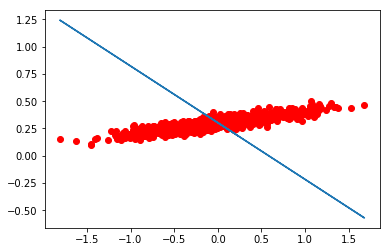

1 [-0.3389] [0.30198354]


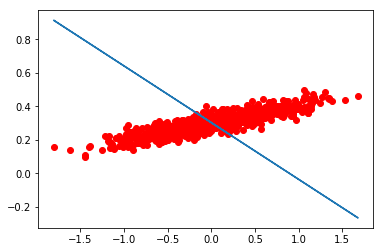

2 [-0.21061313] [0.30143878]


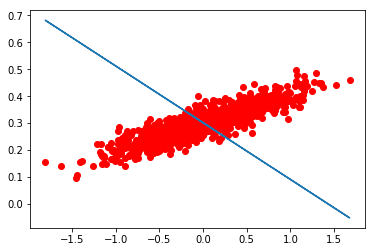

3 [-0.11969995] [0.30105272]


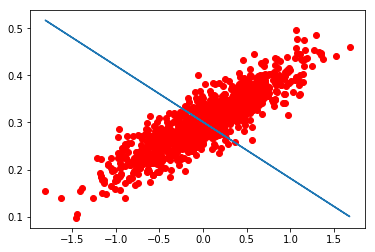

4 [-0.05527242] [0.30077913]


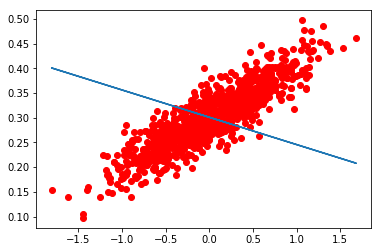

5 [-0.0096145] [0.30058527]


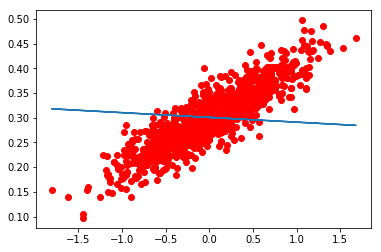

6 [0.02274195] [0.30044785]


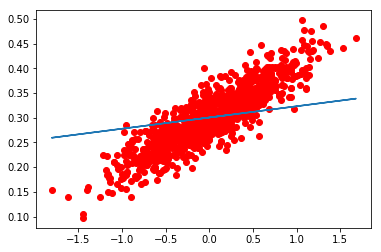

7 [0.04567202] [0.3003505]


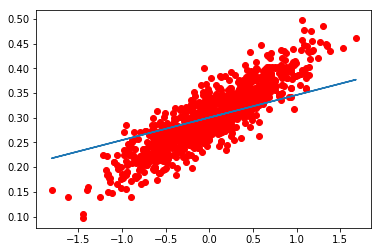

8 [0.0619219] [0.3002815]


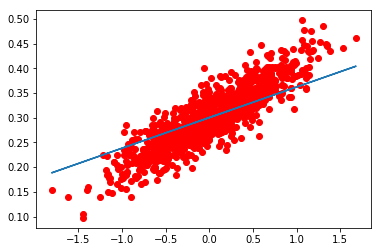

9 [0.07343772] [0.3002326]


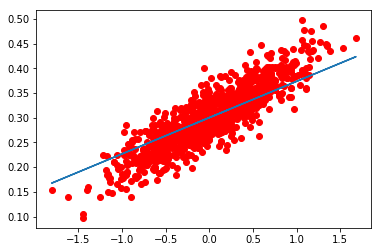

10 [0.08159865] [0.30019793]


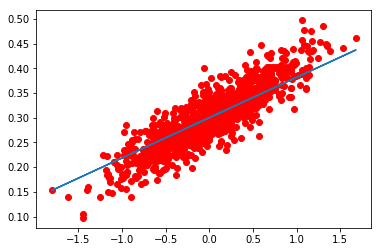

11 [0.08738206] [0.30017337]


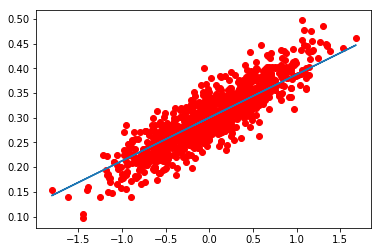

12 [0.0914806] [0.30015597]


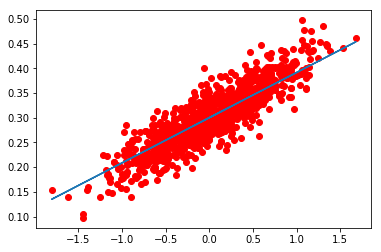

13 [0.09438511] [0.30014363]


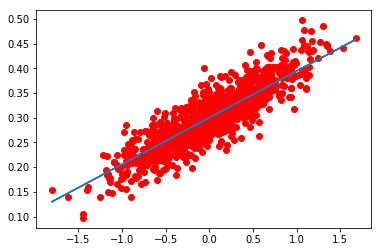

14 [0.09644345] [0.3001349]


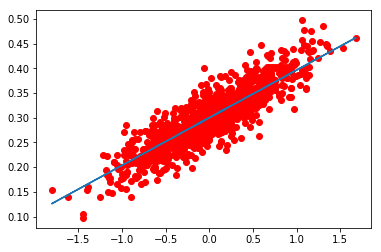

15 [0.09790214] [0.3001287]


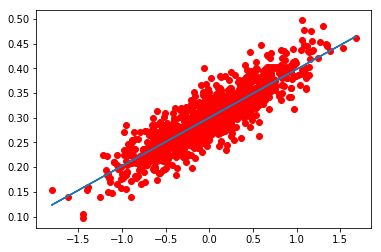

16 [0.09893587] [0.30012432]


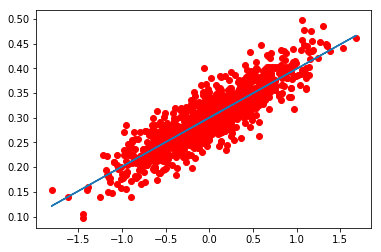

17 [0.09966845] [0.3001212]


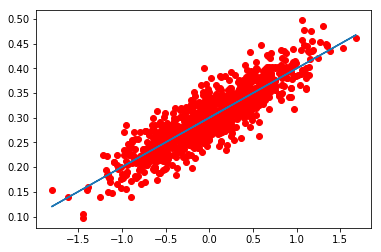

18 [0.10018761] [0.30011898]


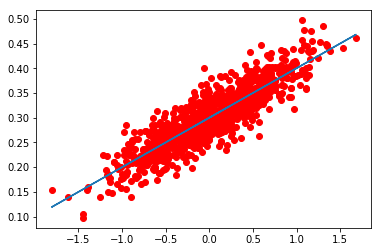

19 [0.10055552] [0.30011743]


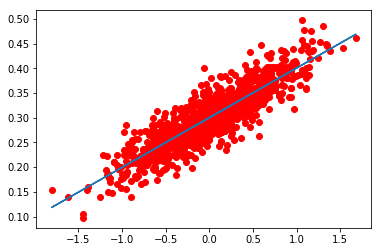

In [8]:
init = tf.global_variables_initializer()

config = tf.ConfigProto()
config.gpu_options.allow_growth=True
with tf.Session(config=config) as sess:
    sess.run(init)
    for step in range(20):
        sess.run(train)
        print(step, sess.run(W), sess.run(b))
        
        plt.plot(x_data, y_data, 'ro')
        plt.plot(x_data, sess.run(W) * x_data + sess.run(b))
        plt.show()